https://stats.stackexchange.com/questions/376312/mnist-digit-recognition-what-is-the-best-we-can-get-with-a-fully-connected-nn-o

https://www.python-course.eu/neural_network_mnist.php

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit as activation_function  # 1/(1+exp(-x)), sigmoid
from scipy.stats import truncnorm

In [2]:
if True:  # recreate MNIST arrays. Do it only once, after that modify to False
    train_data = np.loadtxt("../../dataset/mnist_train.csv", delimiter=",")
    test_data = np.loadtxt("../../dataset/mnist_test.csv", delimiter=",")
    train_imgs = np.asfarray(train_data[:, 1:]) / 255.0
    test_imgs = np.asfarray(test_data[:, 1:]) / 255.0
    train_labels = np.asfarray(train_data[:, :1])
    test_labels = np.asfarray(test_data[:, :1])
    lr = np.arange(10)
    train_labels_one_hot = (lr==train_labels).astype(np.float)
    test_labels_one_hot = (lr==test_labels).astype(np.float)
    for i, d in enumerate([train_imgs, test_imgs, train_labels, test_labels, train_labels_one_hot, test_labels_one_hot]):
        np.save('%i.array' % i, d)

(train_imgs, test_imgs, train_labels, test_labels, train_labels_one_hot, test_labels_one_hot) = [np.load('%i.array.npy' % i) for i in range(6)]

print('Data loaded.')

Data loaded.


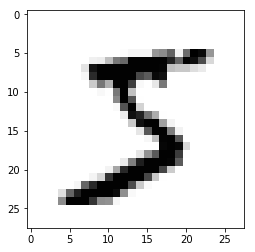

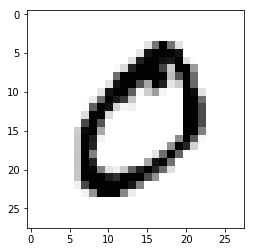

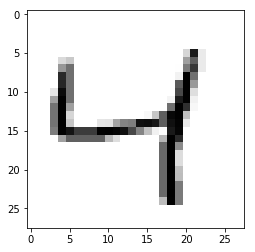

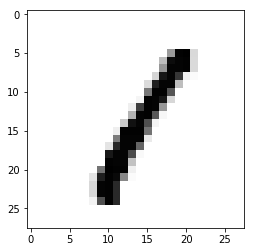

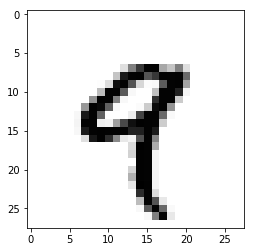

In [5]:
if True:  # True to show images
    for i in range(5):
        img = train_imgs[i].reshape((28,28))
        plt.imshow(img, cmap="Greys")
        plt.show()

In [6]:
class NeuralNetwork:
    def __init__(self, network_structure, learning_rate, bias=None):  
        self.structure = network_structure
        self.no_of_layers = len(self.structure)
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()

    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        for k in range(self.no_of_layers-1):
            nodes_in = self.structure[k]
            nodes_out = self.structure[k+1]
            n = (nodes_in + bias_node) * nodes_out
            X = truncnorm(-1, 1,  loc=0, scale=1)
            #X = truncnorm(-1 / np.sqrt(nodes_in), 1 / np.sqrt(nodes_in),  loc=0, scale=1)  # accuracy is worse
            wm = X.rvs(n).reshape((nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(wm)

    def train(self, input_vector, target_vector): 
        input_vector = np.array(input_vector, ndmin=2).T
        res_vectors = [input_vector]
        for k in range(self.no_of_layers-1):
            in_vector = res_vectors[-1]
            if self.bias:
                in_vector = np.concatenate((in_vector, [[self.bias]]))
                res_vectors[-1] = in_vector
            x = np.dot(self.weights_matrices[k], in_vector)
            out_vector = activation_function(x)
            res_vectors.append(out_vector)    

        target_vector = np.array(target_vector, ndmin=2).T
        output_errors = target_vector - out_vector  
        for k in range(self.no_of_layers-1, 0, -1):
            out_vector = res_vectors[k]
            in_vector = res_vectors[k-1]
            if self.bias and not k==(self.no_of_layers-1):
                out_vector = out_vector[:-1,:].copy()
            tmp = output_errors * out_vector * (1.0 - out_vector)  # sigma'(x) = sigma(x) (1 - sigma(x))
            tmp = np.dot(tmp, in_vector.T)
            self.weights_matrices[k-1] += self.learning_rate * tmp
            output_errors = np.dot(self.weights_matrices[k-1].T, output_errors)
            if self.bias:
                output_errors = output_errors[:-1,:]

    def run(self, input_vector):
        if self.bias:
            input_vector = np.concatenate((input_vector, [self.bias]))
        in_vector = np.array(input_vector, ndmin=2).T
        for k in range(self.no_of_layers-1):
            x = np.dot(self.weights_matrices[k], in_vector)
            out_vector = activation_function(x)
            in_vector = out_vector
            if self.bias:
                in_vector = np.concatenate((in_vector, [[self.bias]]))
        return out_vector

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [7]:
ANN = NeuralNetwork(network_structure=[784, 200, 80, 10], learning_rate=0.01, bias=None)

for epoch in range(3):
    for i in range(len(train_imgs)):
        if i % 1000 == 0:
            print('epoch:', epoch, 'img number:', i, '/', len(train_imgs))
        ANN.train(train_imgs[i], train_labels_one_hot[i])

epoch: 0 img number: 0 / 60000
epoch: 0 img number: 1000 / 60000
epoch: 0 img number: 2000 / 60000
epoch: 0 img number: 3000 / 60000
epoch: 0 img number: 4000 / 60000
epoch: 0 img number: 5000 / 60000
epoch: 0 img number: 6000 / 60000
epoch: 0 img number: 7000 / 60000
epoch: 0 img number: 8000 / 60000
epoch: 0 img number: 9000 / 60000
epoch: 0 img number: 10000 / 60000
epoch: 0 img number: 11000 / 60000
epoch: 0 img number: 12000 / 60000
epoch: 0 img number: 13000 / 60000
epoch: 0 img number: 14000 / 60000
epoch: 0 img number: 15000 / 60000
epoch: 0 img number: 16000 / 60000
epoch: 0 img number: 17000 / 60000
epoch: 0 img number: 18000 / 60000
epoch: 0 img number: 19000 / 60000
epoch: 0 img number: 20000 / 60000
epoch: 0 img number: 21000 / 60000
epoch: 0 img number: 22000 / 60000
epoch: 0 img number: 23000 / 60000
epoch: 0 img number: 24000 / 60000
epoch: 0 img number: 25000 / 60000
epoch: 0 img number: 26000 / 60000
epoch: 0 img number: 27000 / 60000
epoch: 0 img number: 28000 / 6000

In [8]:
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accruracy: test", corrects / (corrects + wrongs))

accruracy: test 0.9628
